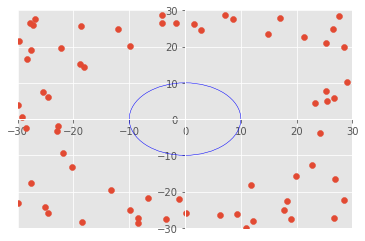

In [60]:
#%%

from typing import NamedTuple, List
import random
from random import uniform
import matplotlib.pyplot as plt
import math

# 2D world/earth surface
# one "world coordinate frame", origin (0, 0), x-axis to the right, y-axis up

Meter = float
Radian = float

class Point(NamedTuple):
    x: Meter
    y: Meter
    
    
class Circle(NamedTuple):
    p: Point
    r: Meter

# world bounding box
class BoundingBox(NamedTuple):
    lower_left: Point
    upper_right: Point

world_bb = BoundingBox(lower_left=Point(-10,-10),
                       upper_right=Point(10, 10))

earth = Circle(Point(0.0, 0.0), 10)


# camera point directly away from 2D earth

class Camera(NamedTuple):
   """
   Assume camera is pointing directly away from earth, so the camera
   pose is representing by one number, it's position on the surface of 
   the earth.  position == angle in [-pi, pi)
   maybe use [0, 2pi]?
   """
   angle: float


def cam_xy(cam: Camera) -> Point:
    pass

# random star field

Stars = List[Point]

n_stars = 100

'''
random_xs = [uniform(world_bb.lower_left.x, world_bb.upper_right.x)
             for _ in range(n_stars)]
random_ys = [uniform(world_bb.lower_left.y, world_bb.upper_right.y)
             for _ in range(n_stars)]
'''

#temp solution
random_xs = [uniform(0,30.0) for _ in range(50)] + [uniform(0, -30.0) for _ in range(50)]

random_ys = [uniform(0,30.0) for _ in range(50)] + [uniform(0,-30.0) for _ in range(50)]

random.shuffle(random_xs); random.shuffle(random_xs)

def distance_point_circle(p: Point, c: Circle) -> Meter:
    # d = distance between p and center of circle
    d = math.sqrt((p.x - c.p.x) ** 2 + (p.y - c.p.y) ** 2)
    d -= c.r
    return d
    
def in_earth(p: Point, earth: Circle) -> bool:
    # distance from point to circle is less than or equal to the radius of the earth
    # .     (      .      )
    margin = 1.0
    return distance_point_circle(p, earth) <= earth.r + margin
    

stars = [Point(x, y) for x, y in zip(random_xs, random_ys)
         if not in_earth(Point(x, y), earth)]

x = [i.x for i in stars]
y = [i.y for i in stars]

# draw earth and stars and camera
circle1 = plt.Circle((earth.p.x, earth.p.y), earth.r , color='b',fill=False)

#Configuring settings to center the circle onto the origin and zoom out
plt.style.use('ggplot')
fig, ax = plt.subplots()
ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')

lims = (-30,30)
plt.xlim(lims)
plt.ylim(lims)

ax.add_artist(circle1)
plt.scatter(x,y)
plt.plot()
plt.show()
# simulated image

# star map

# cross correlation image matching to known map

